In [15]:
# first neural network with keras tutorial
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [9]:
dataframe = pd.read_excel('pima-indians-diabetes (1).xlsx')
dataframe.head()


,6.000,148.000,72.000,35.000,0.000,33.600,0.627,50.000,1.000
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [11]:
# split into input (X) and output (y) variables
X = dataframe.iloc[:,:8]
y = dataframe.iloc[:,8]
dataframe.shape


(767, 9)

In [12]:
features_train,features_test,target_train,target_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [14]:
from keras import models, layers
network=models.Sequential()
network.add(Dense(units=8,activation="relu",input_shape=(features_train.shape[1],)))
network.add(Dense(units=8,activation="relu"))
#network.add(Dense(units=16,activation="relu"))
network.add(Dense(units=1,activation="sigmoid"))

In [16]:
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history=network.fit(features_train,target_train,epochs=20,verbose=1,batch_size=100,validation_data=(features_test,target_test))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 228ms/step - accuracy: 0.3918 - loss: 10.5899 - val_accuracy: 0.3780 - val_loss: 11.1551
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.3938 - loss: 8.7751 - val_accuracy: 0.3780 - val_loss: 9.3917
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.3977 - loss: 7.3196 - val_accuracy: 0.3819 - val_loss: 7.6991
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.3957 - loss: 5.9437 - val_accuracy: 0.4134 - val_loss: 6.2470
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4055 - loss: 4.8196 - val_accuracy: 0.4134 - val_loss: 5.0594
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.4250 - loss: 3.9528 - val_accuracy: 0.4567 - val_loss: 4.0884
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4483 - loss: 3.2055 - val_accuracy: 0.4803 - val_loss: 3.3014
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.4834 - loss: 2.6353 - val_accuracy: 0.5236 - val_loss: 2.

In [18]:
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]

In [19]:
epoch_count=range(1,len(training_loss)+1)

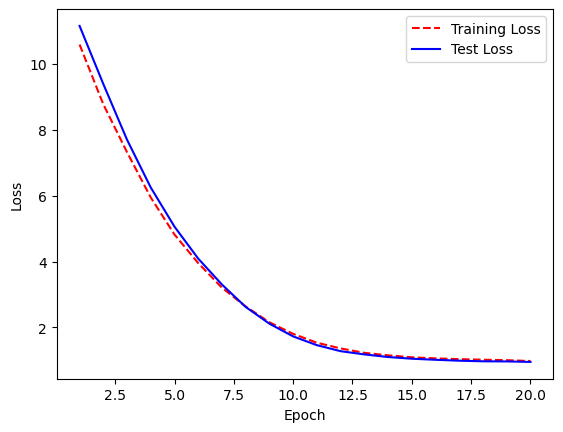

In [20]:
plt.plot(epoch_count,training_loss,"r--")
plt.plot(epoch_count,test_loss,"b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [21]:
_, accuracy = network.evaluate(features_train,target_train)
print('Accuracy: %.2f' % (accuracy*100))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6394 - loss: 0.9785
Accuracy: 63.94


In [22]:
# preict using the keras model
predicted_target= network.predict(features_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 


In [23]:
_, accuracy = network.evaluate(features_test,target_test)
print('Accuracy: %.2f' % (accuracy*100))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6535 - loss: 0.9521
Accuracy: 65.35


In [24]:
#Y=target_train
for i in range(10):
    print(predicted_target[i])

[0.29989493]
[0.7724581]
[0.74252295]
[0.99924594]
[0.54887736]
[0.13560341]
[0.7219132]
[0.99380636]
[0.22963087]
[0.1742055]


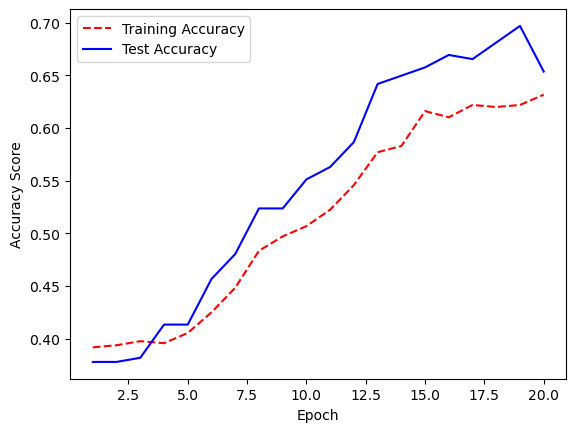

In [25]:
training_accuracy=history.history["accuracy"]
test_accuracy=history.history["val_accuracy"]
plt.plot(epoch_count,training_accuracy,"r--")
plt.plot(epoch_count,test_accuracy,"b-")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()


Epoch 1/20


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.6316 - loss: 8.7176 - val_accuracy: 0.6890 - val_loss: 6.8626
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6335 - loss: 7.0879 - val_accuracy: 0.6890 - val_loss: 5.4914
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6257 - loss: 5.5774 - val_accuracy: 0.6929 - val_loss: 4.2087
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6296 - loss: 4.1592 - val_accuracy: 0.6969 - val_loss: 3.0893
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6335 - loss: 2.9721 - val_accuracy: 0.6575 - val_loss: 2.2381
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6062 - loss: 2.1241 - val_accuracy: 0.6339 - val_loss: 1.7485
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5789 - loss: 1.5777 - val_accuracy: 0.5787 - val_loss: 1.5134
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5458 - loss: 1.3318 - val_accuracy: 0.5197 - val_loss: 1.4415
Epoch 9/20

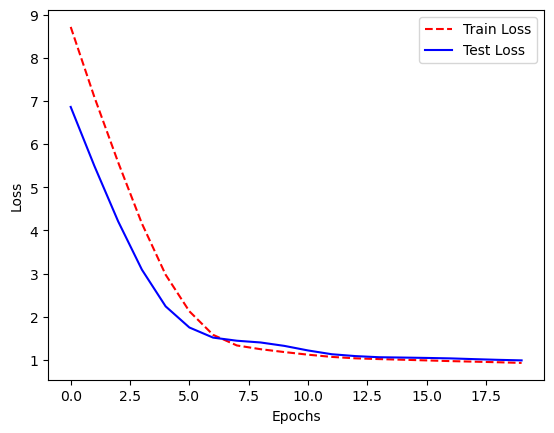

Train Accuracy: 58.48% | Test Accuracy: 58.27%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Sample Predictions:
 [[0.5198512 ]
 [0.0020886 ]
 [0.53556544]
 [0.30944076]
 [0.40178296]
 [0.05790594]
 [0.46550673]
 [0.05003632]
 [0.92875344]
 [0.78653187]]


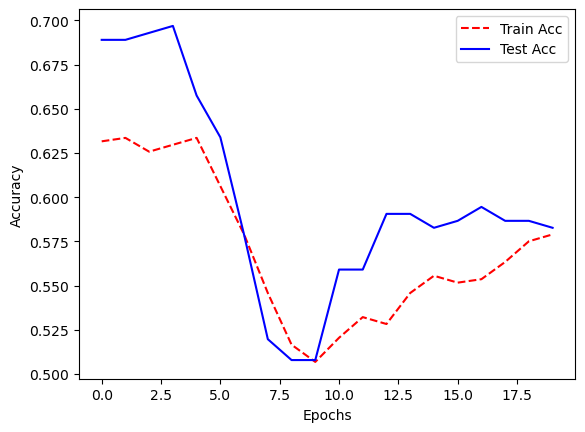

In [26]:
# Neural Network for Pima Indians Diabetes Prediction
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('pima-indians-diabetes (1).xlsx')
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Define model
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test), verbose=1)

# Plot loss
plt.plot(history.history['loss'], 'r--', label='Train Loss')
plt.plot(history.history['val_loss'], 'b-', label='Test Loss')
plt.legend(), plt.xlabel('Epochs'), plt.ylabel('Loss')
plt.show()

# Accuracy
train_acc = model.evaluate(X_train, y_train, verbose=0)[1] * 100
test_acc = model.evaluate(X_test, y_test, verbose=0)[1] * 100
print(f"Train Accuracy: {train_acc:.2f}% | Test Accuracy: {test_acc:.2f}%")

# Sample predictions
preds = model.predict(X_test[:10])
print("Sample Predictions:\n", preds)

# Plot accuracy
plt.plot(history.history['accuracy'], 'r--', label='Train Acc')
plt.plot(history.history['val_accuracy'], 'b-', label='Test Acc')
plt.legend(), plt.xlabel('Epochs'), plt.ylabel('Accuracy')
plt.show()
